In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/home/wfn7ad/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
final_data = pd.read_csv("../../data/mergent_and_library/final_data_v2.csv")
final_data

X  Unnamed..0         duns                         company_name  \
0          0           0  00-138-3244           WILSON, LYNNFORD SAMUEL JR   
1          1           1  00-145-3948                 CROCODILE CONSULTING   
2          2           2  00-145-3948                 CROCODILE CONSULTING   
3          3           3  00-171-0412          CENTREVILLE TAX SERVICE LLC   
4          4           4  00-183-0152                        KAUFMAN ASSOC   
...      ...         ...          ...                                  ...   
18151  18151       18151  96-994-4219                         GEOPAY, INC.   
18152  18152       18152  96-995-4812   K EDWARD ROBINSON & ASSOCIATES LLC   
18153  18153       18153  96-996-0488            LAGNIAPPE CONSULTING, LLC   
18154  18154       18154  96-996-0488            LAGNIAPPE CONSULTING, LLC   
18155  18155       18155  96-998-7424  ACQUISITION MANAGEMENT SYSTEMS, LLC   

      firstname         lastname                           title  gender  \
0      Lynnford           Wilson                           Owner       U   
1       Jessica            Moore  Administrative Assistant Sales  FEMALE   
2       Leonard         Caldwell                           Owner    MALE   
3         Scott            Walls                           Owner    MALE   
4         Betsy          Kaufman                           Owner  FEMALE   
...         ...              ...                             ...     ...   
18151     Karla          Russell         Chief Operating Officer  FEMALE   
18152     Keith         Robinson                        Pres-ceo    MALE   
18153   Wallace          Daniels                           Owner    MALE   
18154      Omar          Daniels                        Co-owner    MALE   
18155     Helen  Zilvinskis-clar                          Member  FEMALE   

       flag_owner  flag_presi_vicepresi  ...  \
0               1                     0  ...   
1               0                     0  ...   
2               1                     0  ...   
3               1                     0  ...   
4               1                     0  ...   
...           ...                   ...  ...   
18151           0                     0  ...   
18152           0                     0  ...   
18153           1                     0  ...   
18154           0                     0  ...   
18155           0                     0  ...   

                                             naics_name  \
0                     Health Care and Social Assistance   
1      Professional, Scientific, and Technical Services   
2      Professional, Scientific, and Technical Services   
3      Professional, Scientific, and Technical Services   
4      Professional, Scientific, and Technical Services   
...                                                 ...   
18151     Other Services (except Public Administration)   
18152  Professional, Scientific, and Technical Services   
18153  Professional, Scientific, and Technical Services   
18154  Professional, Scientific, and Technical Services   
18155  Professional, Scientific, and Technical Services   

       flag_executive_reported         geoid   prop_nwh  \
0                            1  5.105948e+10  26.602177   
1                            1  5.105948e+10  20.372268   
2                            1  5.105948e+10  20.372268   
3                            1  5.105949e+10  19.153605   
4                            1  5.105942e+10  36.208236   
...                        ...           ...        ...   
18151                        1  5.105948e+10  34.302699   
18152                        1  5.105942e+10  62.402930   
18153                        1  5.105942e+10  60.324061   
18154                        1  5.105942e+10  60.324061   
18155                        1  5.105946e+10  48.968879   

                       geometry  prob_spacy prob_gt prob_ld prob_nw_rbert  \
0      c(-77.324596, 38.999535)    0.999995     0.0       1      0.819709   
1      c(-77

In [3]:
x = final_data[final_data['flag_listing'] == 1]
x

X  Unnamed..0         duns  \
127      127         127  00-347-7485   
1035    1035        1035  01-022-8836   
1036    1036        1036  01-022-8836   
1037    1037        1037  01-022-8836   
1410    1410        1410  01-298-6663   
...      ...         ...          ...   
17231  17231       17231  96-230-2191   
18078  18078       18078  96-905-4720   
18079  18079       18079  96-905-4720   
18080  18080       18080  96-905-4720   
18081  18081       18081  96-905-4720   

                                    company_name firstname lastname  \
127               DSB MANAGEMENT CONSULTANTS LLC     Donna    Brown   
1035                           ICUBE SYSTEMS INC   Narayan  Athreya   
1036                           ICUBE SYSTEMS INC   Narayan  Athreya   
1037                           ICUBE SYSTEMS INC    Geetha  Athreya   
1410     HYATT PLACE HERNDON/DULLES AIRPORT EAST    Rajesh    Singh   
...                                          ...       ...      ...   
17231  JP CONSTRUCTION & BUILDING SERVICES, INC.      Jung     Park   
18078                         MERP SYSTEMS, INC.      Sree     Nair   
18079                         MERP SYSTEMS, INC.      Prem     Nair   
18080                         MERP SYSTEMS, INC.      Prem     Nair   
18081                         MERP SYSTEMS, INC.      Prem    Kumar   

                    title  gender  flag_owner  flag_presi_vicepresi  ...  \
127                  Prin  FEMALE           0                     0  ...   
1035            President    MALE           0                     1  ...   
1036      General Manager    MALE           0                     0  ...   
1037      General Manager  FEMALE           0                     0  ...   
1410      General Manager    MALE           0                     0  ...   
...                   ...     ...         ...                   ...  ...   
17231           Presidnet    MALE           0                     0  ...   
18078      Vice President  FEMALE           0                     1  ...   
18079             Partner    MALE           0                     0  ...   
18080     General Manager    MALE           0                     0  ...   
18081  Executive Director    MALE           0                     0  ...   

                                             naics_name  \
127    Professional, Scientific, and Technical Services   
1035   Professional, Scientific, and Technical Services   
1036   Professional, Scientific, and Technical Services   
1037   Professional, Scientific, and Technical Services   
1410                    Accommodation and Food Services   
...                                                 ...   
17231                                      Construction   
18078  Professional, Scientific, and Technical Services   
18079  Professional, Scientific, and Technical Services   
18080  Professional, Scientific, and Technical Services   
18081  Professional, Scientific, and Technical Services   

       flag_executive_reported         geoid   prop_nwh  \
127                          1  5.105945e+10  42.839879   
1035                         1  5.105949e+10  56.009403   
1036                         1  5.105949e+10  56.009403   
1037                         1  5.105949e+10  56.009403   
1410                         1  5.105948e+10  58.622301   
...                        ...           ...        ...   
17231                        1  5.105943e+10  33.479512   
18078                        1  5.105948e+10  39.921530   
18079                        1  5.105948e+10  39.921530   
18080                        1  5.105948e+10  39.921530   
18081                        1  5.105948e+10  39.921530   

                       geometry  prob_spacy   prob_gt prob_ld prob_nw_rbert  \
127    c(-77.200105, 38.844514)    0.000000  0.000000       0      0.173511   
1035   c(-77.408478, 38.832827)    0.999992  0.606891       1      0.928174   
1036   c(-77.408478, 38.832827)    0.999992  0.606891       1           NaN   
1037   c(-77.40847

In [4]:
final_data.columns

Index(['X', 'Unnamed..0', 'duns', 'company_name', 'firstname', 'lastname',
       'title', 'gender', 'flag_owner', 'flag_presi_vicepresi',
       'prob_nw_eth_wiki', 'prob_nw_eth_fl_reg_name',
       'prob_nw_eth_fl_five_cat', 'prob_nw_eth_census_fn',
       'prob_nw_eth_census_ln', 'prob_nw_eth_nc', 'company_name0', 'address',
       'city', 'state', 'zipcode', 'flag_mergent', 'pos', 'flag_axle',
       'flag_sbsd', 'flag_chamber', 'flag_yelp', 'flag_listing',
       'flag_mergent_plus_listing', 'founding_year', 'primary_naics', 'naics2',
       'naics_name', 'flag_executive_reported', 'geoid', 'prop_nwh',
       'geometry', 'prob_spacy', 'prob_gt', 'prob_ld', 'prob_nw_rbert',
       'prob_nw_rethn'],
      dtype='object')

In [5]:
varlist=['duns','company_name', 'flag_owner', 'flag_mergent_plus_listing','flag_mergent', 'flag_listing', 'founding_year','naics2', 'prop_nwh', 'prob_nw_eth_wiki', 'prob_nw_eth_fl_reg_name',
       'prob_nw_eth_fl_five_cat', 'prob_nw_eth_census_fn',
       'prob_nw_eth_census_ln', 'prob_nw_eth_nc','prob_spacy', 'prob_gt', 'prob_ld', 'prob_nw_rbert',
       'prob_nw_rethn']

data = final_data[varlist]

In [6]:
print('number of observation',len(data))
data.isna().sum()

number of observation 18156


duns                             0
company_name                     0
flag_owner                       0
flag_mergent_plus_listing        0
flag_mergent                     0
flag_listing                     0
founding_year                    9
naics2                           0
prop_nwh                       280
prob_nw_eth_wiki              1846
prob_nw_eth_fl_reg_name       3380
prob_nw_eth_fl_five_cat      11800
prob_nw_eth_census_fn        13625
prob_nw_eth_census_ln         7959
prob_nw_eth_nc               11800
prob_spacy                       0
prob_gt                          0
prob_ld                          0
prob_nw_rbert                14724
prob_nw_rethn                    0
dtype: int64

In [7]:
print('number of observation',len(data))
df1 = data[pd.notna(data['prop_nwh'])]
df1.isna().sum()

number of observation 18156


duns                             0
company_name                     0
flag_owner                       0
flag_mergent_plus_listing        0
flag_mergent                     0
flag_listing                     0
founding_year                    7
naics2                           0
prop_nwh                         0
prob_nw_eth_wiki              1818
prob_nw_eth_fl_reg_name       3324
prob_nw_eth_fl_five_cat      11591
prob_nw_eth_census_fn        13397
prob_nw_eth_census_ln         7810
prob_nw_eth_nc               11591
prob_spacy                       0
prob_gt                          0
prob_ld                          0
prob_nw_rbert                14504
prob_nw_rethn                    0
dtype: int64

In [8]:
df1.loc[df1['prob_nw_eth_wiki'] == 1.0, 'prob_nw_eth_wiki'] = float("nan")
df1

duns                         company_name  flag_owner  \
0      00-138-3244           WILSON, LYNNFORD SAMUEL JR           1   
1      00-145-3948                 CROCODILE CONSULTING           0   
2      00-145-3948                 CROCODILE CONSULTING           1   
3      00-171-0412          CENTREVILLE TAX SERVICE LLC           1   
4      00-183-0152                        KAUFMAN ASSOC           1   
...            ...                                  ...         ...   
18151  96-994-4219                         GEOPAY, INC.           0   
18152  96-995-4812   K EDWARD ROBINSON & ASSOCIATES LLC           0   
18153  96-996-0488            LAGNIAPPE CONSULTING, LLC           1   
18154  96-996-0488            LAGNIAPPE CONSULTING, LLC           0   
18155  96-998-7424  ACQUISITION MANAGEMENT SYSTEMS, LLC           0   

       flag_mergent_plus_listing  flag_mergent  flag_listing  founding_year  \
0                              0             0             0         2002.0   
1                              0             0             0         2000.0   
2                              0             0             0         2000.0   
3                              0             0             0         1997.0   
4                              0             0             0         1997.0   
...                          ...           ...           ...            ...   
18151                          0             0             0         2011.0   
18152                          0             0             0         2011.0   
18153                          1             1             0         2011.0   
18154                          1             1             0         2011.0   
18155                          0             0             0         2011.0   

       naics2   prop_nwh  prob_nw_eth_wiki  prob_nw_eth_fl_reg_name  \
0          62  26.602177          0.917946                 0.621173   
1          54  20.372268               NaN                      NaN   
2          54  20.372268               NaN                      NaN   
3          54  19.153605          0.087375                 0.116998   
4          54  36.208236          0.957856                 0.843029   
...       ...        ...               ...                      ...   
18151      81  34.302699          0.747244                 0.962319   
18152      54  62.402930               NaN                      NaN   
18153      54  60.324061          0.064103                 0.202185   
18154      54  60.324061          0.022954                 0.134204   
18155      54  48.968879          0.986989                 0.861210   

       prob_nw_eth_fl_five_cat  prob_nw_eth_census_fn  prob_nw_eth_census_ln  \
0                          NaN                    NaN               0.339193   
1                          NaN                    NaN                    NaN   
2                          NaN                    NaN                    NaN   
3                          NaN                    NaN                    NaN   
4                          NaN                    NaN                    NaN   
...                        ...                    ...                    ...   
18151                 0.595566               0.602393               0.011384   
18152                      NaN                    NaN                    NaN   
18153                 0.389103               0.199878               0.096081   
18154                 0.373937               0.248325               0.126127   
18155                      NaN                    NaN               0.608285   

       prob_nw_eth_nc  prob_spacy  prob_gt  prob_ld  prob_nw_rbert  \
0                 NaN    0.999995      0.0        1       0.819709   
1                 NaN    0.000000      0.0        0       0.201729   
2                 NaN    0.000000      0.0        0       0.402071   
3                 NaN    0.999994      0.0        1       0.023717   
4                 NaN    0.999673      0.0      

In [9]:
# compute statistics by company (not by owner+company)
df2 = df1.groupby(['duns']).mean(numeric_only=True)
df2.isna().sum()

flag_owner                      0
flag_mergent_plus_listing       0
flag_mergent                    0
flag_listing                    0
founding_year                   6
naics2                          0
prop_nwh                        0
prob_nw_eth_wiki             1433
prob_nw_eth_fl_reg_name      1433
prob_nw_eth_fl_five_cat      8100
prob_nw_eth_census_fn        9384
prob_nw_eth_census_ln        5306
prob_nw_eth_nc               8100
prob_spacy                      0
prob_gt                         0
prob_ld                         0
prob_nw_rbert                9197
prob_nw_rethn                   0
dtype: int64

In [10]:
# filter on founding year
cutoff = 1964
nonminority_filter = df2[df2['founding_year'] <= cutoff]
nonminority_filter = nonminority_filter[nonminority_filter['founding_year'] != 0]

In [11]:
# EDA of the data
print('number of company in mergent:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_mergent_plus_listing']==1]))
print('number of non minority-owned:',len(nonminority_filter))
print('error made by mergent:', (len(df2[(df2['flag_listing'] == 1) & (df2['flag_mergent'] == 0)]))*100 / len(df2[df2['flag_listing'] == 1]))

number of company in mergent: 12123
number of minority-owned: 442
number of non minority-owned: 69
error made by mergent: 39.473684210526315


# Modeling data

In [12]:
# build the sample
n = len(nonminority_filter)
subset = df2[df2['flag_mergent_plus_listing']==1].sample(n,replace=False)
sample = pd.concat([nonminority_filter, subset])
sample.head()

flag_owner  flag_mergent_plus_listing  flag_mergent  \
duns                                                               
00-490-4579         0.0                        0.0           0.0   
01-664-4866         0.0                        0.0           0.0   
02-030-1743         0.0                        0.0           0.0   
02-363-7416         0.0                        0.0           0.0   
02-380-6391         0.0                        0.0           0.0   

             flag_listing  founding_year  naics2   prop_nwh  prob_nw_eth_wiki  \
duns                                                                            
00-490-4579           0.0         1951.0    48.0  19.603425          0.133032   
01-664-4866           0.0         1957.0    81.0  16.278582          0.308368   
02-030-1743           0.0         1950.0    23.0  28.785951               NaN   
02-363-7416           0.0         1959.0    44.0  66.913727          0.364197   
02-380-6391           0.0         1941.0    23.0  57.698764          0.081215   

             prob_nw_eth_fl_reg_name  prob_nw_eth_fl_five_cat  \
duns                                                            
00-490-4579                 0.282486                      NaN   
01-664-4866                 0.990056                 0.996808   
02-030-1743                      NaN                      NaN   
02-363-7416                 0.400813                      NaN   
02-380-6391                 0.015678                 0.945481   

             prob_nw_eth_census_fn  prob_nw_eth_census_ln  prob_nw_eth_nc  \
duns                                                                        
00-490-4579                    NaN               0.695196             NaN   
01-664-4866               0.212395               0.210200        0.975138   
02-030-1743                    NaN                    NaN             NaN   
02-363-7416                    NaN                    NaN             NaN   
02-380-6391                    NaN               0.964284        0.755374   

             prob_spacy  prob_gt  prob_ld  prob_nw_rbert  prob_nw_rethn  
duns                                                                     
00-490-4579    0.999994      0.0      1.0       0.388712       0.364378  
01-664-4866    0.999835      0.0      1.0            NaN       0.552304  
02-030-1743    0.999992      0.0      1.0            NaN       0.554421  
02-363-7416    0.999833      0.0      1.0            NaN       0.252118  
02-380-6391    0.999832      0.0      1.0            NaN       0.963356

In [13]:
print("number of listing in sample:", len(sample[sample['flag_listing']==1]))
test= sample[sample['flag_listing']==1]
test.head()

number of listing in sample: 5


flag_owner  flag_mergent_plus_listing  flag_mergent  \
duns                                                               
08-002-1476         0.0                        1.0           1.0   
05-674-1583         0.0                        1.0           0.0   
96-211-2228         1.0                        1.0           1.0   
00-347-7485         0.0                        1.0           1.0   
80-075-1112         0.0                        1.0           1.0   

             flag_listing  founding_year  naics2   prop_nwh  prob_nw_eth_wiki  \
duns                                                                            
08-002-1476           1.0         2015.0    54.0  39.921530               NaN   
05-674-1583           1.0         1999.0    62.0  43.080357          0.097634   
96-211-2228           1.0         2009.0    52.0  27.077295          0.117092   
00-347-7485           1.0         2007.0    54.0  42.839879          0.039917   
80-075-1112           1.0         2006.0    54.0  43.360592               NaN   

             prob_nw_eth_fl_reg_name  prob_nw_eth_fl_five_cat  \
duns                                                            
08-002-1476                      NaN                      NaN   
05-674-1583                 0.107314                      NaN   
96-211-2228                 0.018112                      NaN   
00-347-7485                 0.134776                      NaN   
80-075-1112                      NaN                      NaN   

             prob_nw_eth_census_fn  prob_nw_eth_census_ln  prob_nw_eth_nc  \
duns                                                                        
08-002-1476                    NaN                    NaN             NaN   
05-674-1583                    NaN               0.342455             NaN   
96-211-2228                    NaN                    NaN             NaN   
00-347-7485                    NaN               0.843644             NaN   
80-075-1112                    NaN                    NaN             NaN   

             prob_spacy  prob_gt  prob_ld  prob_nw_rbert  prob_nw_rethn  
duns                                                                     
08-002-1476    0.000000      0.0      0.0       0.944602       0.998948  
05-674-1583    0.999993      0.0      1.0       0.981419       0.979116  
96-211-2228    0.000000      0.0      0.0            NaN       0.556045  
00-347-7485    0.000000      0.0      0.0       0.173511       0.447859  
80-075-1112    0.000000      0.0      0.0       0.953920       0.961154

# Build and Train a classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

feature_cols = ["prob_nw_rbert", "prob_nw_rethn", "prop_nwh", "prob_ld"]
y = sample['flag_mergent_plus_listing']
X = sample[feature_cols]

# Split the data into training and test sets (70% training and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Store the results of each trial
error_made_by_mergent_list = []
percentage_of_minority_owned_list = []
precision_list = []
recall_list = []
accuracy_list = []
f1_score_list = []

# Number of trials
num_trials = 10000

for trial in range(num_trials):
    n = len(nonminority_filter)
    subset = df2[df2['flag_mergent_plus_listing']==1].sample(n,replace=False)
    sample = pd.concat([nonminority_filter, subset])
    
    # split the sample into training and test
    feature_cols = ["prob_nw_rbert", "prob_nw_rethn", "prop_nwh", "prob_ld"]
    y = sample['flag_mergent_plus_listing']
    X = sample[feature_cols]

    # Split the data into training and test sets (70% training and 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


    # Create Decision Tree classifier object
    classifier = DecisionTreeClassifier(random_state=0)  # Using trial as random state to change the randomness for each trial
    
    # Train Decision Tree classifier
    clf = classifier.fit(X_train, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Predict the flag using the model
    df2['flag_predicted'] = clf.predict(df2[feature_cols])
    
    # Validation: Calculate error made by mergent
    error_made_by_mergent = (len(df2[(df2['flag_listing'] == 1) & (df2['flag_predicted'] == 0)])) * 100 / len(df2[df2['flag_listing'] == 1])
    error_made_by_mergent_list.append(error_made_by_mergent)
    
    df2['flag_new'] = df2['flag_mergent']
    df2.loc[df2['flag_new'] == 0, 'flag_new'] = df2.loc[df2['flag_new'] == 0, 'flag_predicted']
    
    # Calculate percentage of minority-owned
    percentage_of_minority_owned = 100*len(df2[df2['flag_new']==1])/len(df2)
    percentage_of_minority_owned_list.append(percentage_of_minority_owned)
    
    # Calculate precision, recall, accuracy, and F1 score
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    f1_score_list.append(f1_score)

# Calculate the overall average accuracy after 10,000 runs using the test dataset
overall_average_accuracy = np.mean(accuracy_list)

# Calculate the average of error made by mergent, percentage of minority-owned, precision, recall, and F1 score over the 10,000 trials
average_error_made_by_mergent = np.mean(error_made_by_mergent_list)
average_percentage_of_minority_owned = np.mean(percentage_of_minority_owned_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)


print("Average error made by mergent:", average_error_made_by_mergent)
print("Average percentage of minority-owned:", average_percentage_of_minority_owned)
print("Average Accuracy:", overall_average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1_score)


Average error made by mergent: 22.34526315789474
Average percentage of minority-owned: 41.75891693475212
Average Accuracy: 0.7410857142857142
Average Precision: 0.7011769490033836
Average Recall: 0.70545
Average F1 Score: 0.6967836401742008


## viewing the decision tree classifier

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

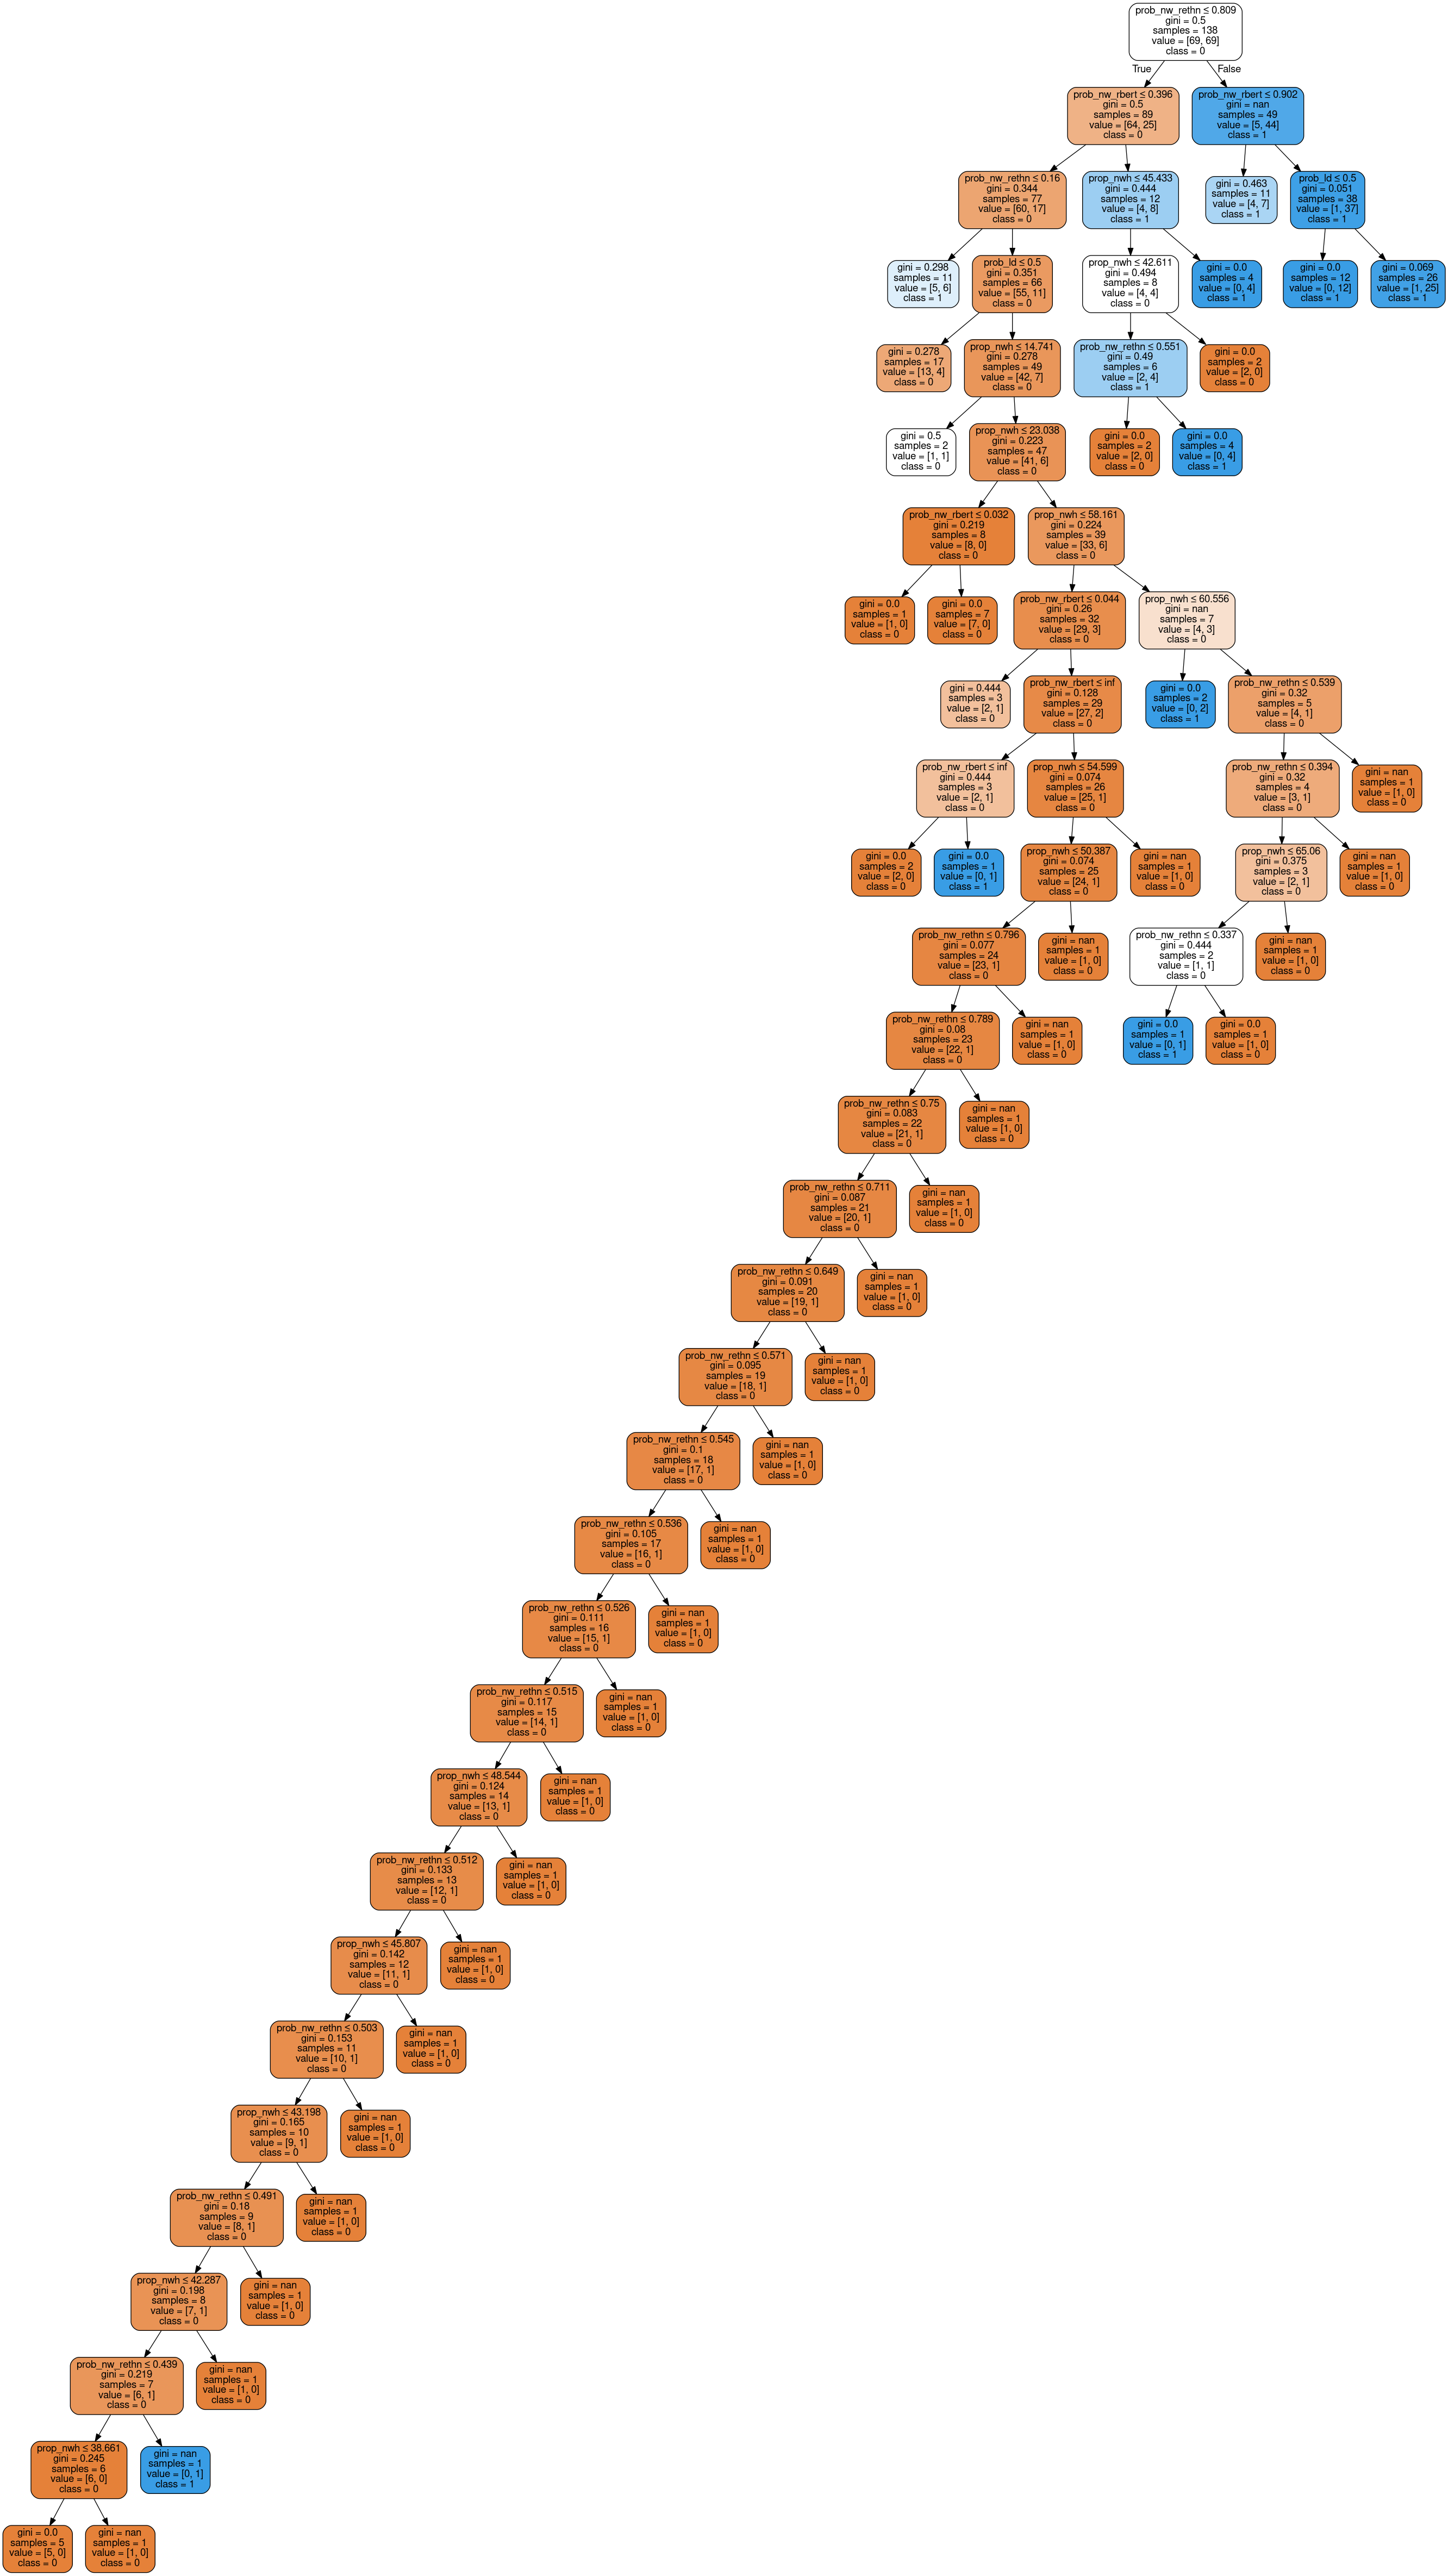

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decTreeREAL.png')
Image(graph.create_png())

# Prediction and evaluation

In [25]:
# predict the flag using the model
df2['flag_predicted'] = clf.predict(df2[feature_cols])

In [26]:
# validation: Does the model reduce the error?
print('error made by mergent:', (len(df2[(df2['flag_listing'] == 1) & (df2['flag_predicted'] == 0)]))*100 / len(df2[df2['flag_listing'] == 1]))

error made by mergent: 18.42105263157895


In [27]:
# Benchmarking:
print('Total number of companies:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_predicted']==1]))
print('Percentage of minority-owned:',100*len(df2[df2['flag_predicted']==1])/len(df2))

Total number of companies: 12123
number of minority-owned: 5744
Percentage of minority-owned: 47.38101130083313


In [28]:
# cross-table for the error
pd.crosstab(df2['flag_predicted'], df2['flag_mergent_plus_listing'])

flag_mergent_plus_listing   0.0  1.0
flag_predicted                      
0.0                        6269  110
1.0                        5412  332

In [29]:
# within the listing, analyse the error
subset_listing=df2[df2['flag_listing']==1]
pd.crosstab(subset_listing['flag_predicted'], subset_listing['flag_mergent'])

# The model correct the flag=0 made by mergent. Out of the 15 wrongly flagged by mergent 12 have been predicted as minority by the model
# However, the model badly predict company already flagged as minority by mergent.

flag_mergent    0.0  1.0
flag_predicted          
0.0               2    5
1.0              13   18

In [30]:
# To correct the biased from the model in wrongly identifying minority, we combine the flag from mergent + the prediction.
# for company already flagged as minority we keep them as minority.
# But for those flagged as non-minority by mergent, we apply the prediction of the model
df2['flag_new'] = df2['flag_mergent']
df2.loc[df2['flag_new'] == 0, 'flag_new'] = df2.loc[df2['flag_new'] == 0, 'flag_predicted']

In [31]:
# Benchmarking:
print('Total number of companies:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_new']==1]))
print('Percentage of minority-owned:',100*len(df2[df2['flag_new']==1])/len(df2))

Total number of companies: 12123
number of minority-owned: 5852
Percentage of minority-owned: 48.27187989771509


In [32]:
# cross-table for the error
pd.crosstab(df2['flag_new'], df2['flag_mergent'])

flag_mergent   0.0  1.0
flag_new               
0.0           6271    0
1.0           5425  427

In [33]:
# save the data
df2.to_csv("../../data/mergent_and_library/predicted_mergent.csv")

# gaining confidence in our method 

In [34]:
# cross the training sample with the listing 
